In [ ]:
# imports
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm
import pickle
import seaborn as sns

In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")
device

device(type='cuda')

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2', device=device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# Load a .parquet file
file_path = 'train-00000-of-00007.parquet'  # Adjust the file path as necessary
df = pd.read_parquet(file_path)

file_path = 'train-00001-of-00007.parquet'  # Adjust the file path as necessary
df1 = pd.read_parquet(file_path)

file_path = 'train-00002-of-00007.parquet'  # Adjust the file path as necessary
df2 = pd.read_parquet(file_path)

file_path = 'train-00003-of-00007.parquet'  # Adjust the file path as necessary
df3 = pd.read_parquet(file_path)

file_path = 'train-00004-of-00007.parquet'  # Adjust the file path as necessary
df4 = pd.read_parquet(file_path)

file_path = 'train-00005-of-00007.parquet'  # Adjust the file path as necessary
df5 = pd.read_parquet(file_path)

file_path = 'train-00006-of-00007.parquet'  # Adjust the file path as necessary
df6 = pd.read_parquet(file_path)


In [ ]:
print(f'number of examples: {len(df) + len(df1) + len(df2) + len(df3) + len(df4) + len(df5) + len(df6)}')

number of examples: 808731


In [ ]:
df.columns

Index(['answers', 'passages', 'query', 'query_id', 'query_type',
       'wellFormedAnswers'],
      dtype='object')

In [ ]:
i = 0

print('----------Query----------')
print(df['query'].to_list()[i])
print()

print('----------Query Type----------')
print(df['query_type'].to_list()[i])
print()

print('----------Passages----------')
for index, passages in enumerate(df['passages'].to_list()[i]['passage_text']):

    print(str(df['passages'].to_list()[i]['is_selected'][index])+f': {passages}')
    print()


print('----------Answer----------')
print(df['answers'].to_list()[i])


print(df['wellFormedAnswers'].to_list()[i])

----------Query----------
)what was the immediate impact of the success of the manhattan project?

----------Query Type----------
DESCRIPTION

----------Passages----------
1: The presence of communication amid scientific minds was equally important to the success of the Manhattan Project as scientific intellect was. The only cloud hanging over the impressive achievement of the atomic researchers and engineers is what their success truly meant; hundreds of thousands of innocent lives obliterated.

0: The Manhattan Project and its atomic bomb helped bring an end to World War II. Its legacy of peaceful uses of atomic energy continues to have an impact on history and science.

0: Essay on The Manhattan Project - The Manhattan Project The Manhattan Project was to see if making an atomic bomb possible. The success of this project would forever change the world forever making it known that something this powerful can be manmade.

0: The Manhattan Project was the name for a project conducted d

{'DESCRIPTION': 356156, 'NUMERIC': 187512, 'ENTITY': 60814, 'LOCATION': 45949, 'PERSON': 42767}


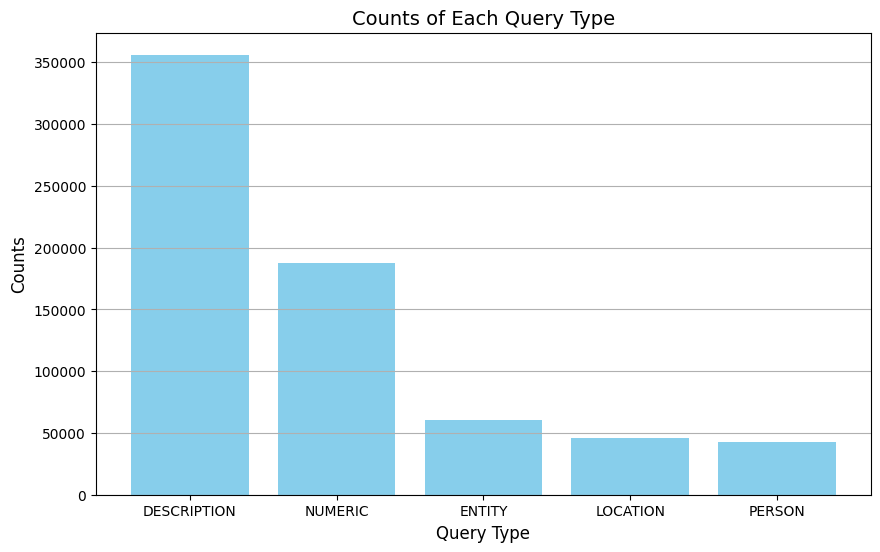

In [ ]:
query_type = df['query_type'].value_counts().to_dict()
query_type1 = df1['query_type'].value_counts().to_dict()
query_type2 = df2['query_type'].value_counts().to_dict()
query_type3 = df3['query_type'].value_counts().to_dict()
query_type4 = df4['query_type'].value_counts().to_dict()
query_type5 = df5['query_type'].value_counts().to_dict()
query_type6 = df6['query_type'].value_counts().to_dict()
tot_query_type = {}

for key in query_type1.keys():

  if key not in tot_query_type.keys():
    tot_query_type[key] = 0

  tot_query_type[key] += query_type1[key] + query_type2[key] + query_type3[key] + query_type4[key] + query_type5[key] + query_type6[key]

print(tot_query_type)
names = list(tot_query_type.keys())
counts = list(tot_query_type.values())

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(names, counts, color='skyblue')

# Add titles and labels
plt.title('Counts of Each Query Type', fontsize=14)
plt.xlabel('Query Type', fontsize=12)
plt.ylabel('Counts', fontsize=12)

# Show grid lines for better readability
plt.grid(axis='y')

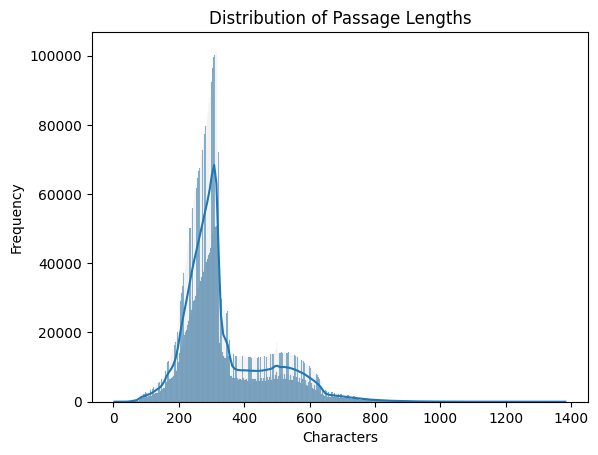

In [ ]:
passage_lengths = []
for passages in df['passages']:
  for passage in passages['passage_text']:
    passage_lengths.append(len(passage))

for passages in df2['passages']:
  for passage in passages['passage_text']:
    passage_lengths.append(len(passage))

for passages in df3['passages']:
  for passage in passages['passage_text']:
    passage_lengths.append(len(passage))

for passages in df4['passages']:
  for passage in passages['passage_text']:
    passage_lengths.append(len(passage))

for passages in df5['passages']:
  for passage in passages['passage_text']:
    passage_lengths.append(len(passage))

for passages in df6['passages']:
  for passage in passages['passage_text']:
    passage_lengths.append(len(passage))

sns.histplot(passage_lengths, kde=True)
plt.title('Distribution of Passage Lengths')
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.show()

  0%|          | 0/115533 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (375 > 256). Running this sequence through the model will result in indexing errors


  0%|          | 0/115533 [00:00<?, ?it/s]

  0%|          | 0/115533 [00:00<?, ?it/s]

  0%|          | 0/115533 [00:00<?, ?it/s]

  0%|          | 0/115533 [00:00<?, ?it/s]

  0%|          | 0/115533 [00:00<?, ?it/s]

  0%|          | 0/115533 [00:00<?, ?it/s]

1497


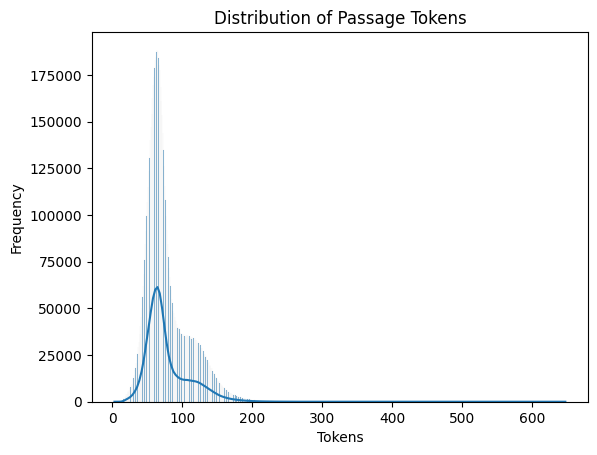

In [ ]:
count = 0
passage_lengths = []
for passages in tqdm(df['passages']):
  for passage in passages['passage_text']:
    tokens = len(model.tokenizer(passage)['input_ids'])
    passage_lengths.append(tokens)
    if tokens > 256:
      count += 1

for passages in tqdm(df1['passages']):
  for passage in passages['passage_text']:
    tokens = len(model.tokenizer(passage)['input_ids'])
    passage_lengths.append(tokens)
    if tokens > 256:
      count += 1

for passages in tqdm(df2['passages']):
  for passage in passages['passage_text']:
    tokens = len(model.tokenizer(passage)['input_ids'])
    passage_lengths.append(tokens)
    if tokens > 256:
      count += 1

for passages in tqdm(df3['passages']):
  for passage in passages['passage_text']:
    tokens = len(model.tokenizer(passage)['input_ids'])
    passage_lengths.append(tokens)
    if tokens > 256:
      count += 1

for passages in tqdm(df4['passages']):
  for passage in passages['passage_text']:
    tokens = len(model.tokenizer(passage)['input_ids'])
    passage_lengths.append(tokens)
    if tokens > 256:
      count += 1

for passages in tqdm(df5['passages']):
  for passage in passages['passage_text']:
    tokens = len(model.tokenizer(passage)['input_ids'])
    passage_lengths.append(tokens)
    if tokens > 256:
      count += 1

for passages in tqdm(df6['passages']):
  for passage in passages['passage_text']:
    tokens = len(model.tokenizer(passage)['input_ids'])
    passage_lengths.append(tokens)
    if tokens > 256:
      count += 1

print(count)

sns.histplot(passage_lengths, kde=True)
plt.title('Distribution of Passage Tokens')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Frequency')

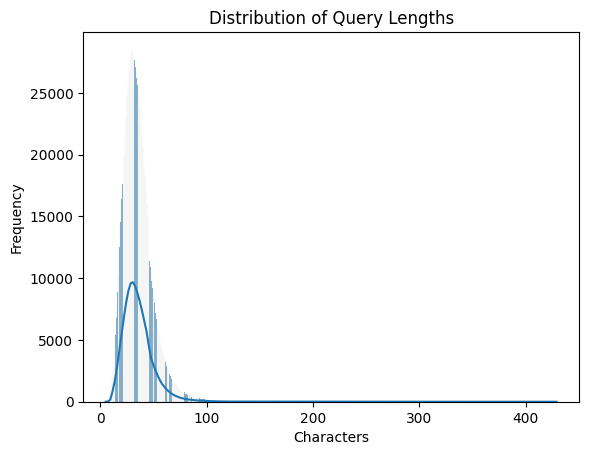

In [ ]:
queries = df['query'].to_list()
queries1 = df1['query'].to_list()
queries2 = df2['query'].to_list()
queries3 = df3['query'].to_list()
queries4 = df4['query'].to_list()
queries5 = df5['query'].to_list()
queries6 = df6['query'].to_list()

tot_queries = queries + queries1 + queries2 + queries3 + queries4 + queries5 + queries6
query_lengths = []

for query in tot_queries:
  query_lengths.append(len(query))

sns.histplot(query_lengths, kde=True)
plt.title('Distribution of Query Lengths')
plt.xlabel('Characters')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

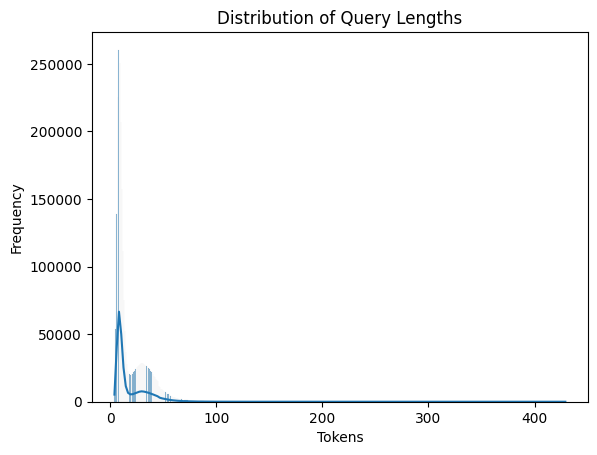

In [ ]:
for query in tot_queries:
  query_lengths.append(len(model.tokenizer(query)['input_ids']))

sns.histplot(query_lengths, kde=True)
plt.title('Distribution of Query Lengths')
plt.xlabel('Tokens')
plt.ylabel('Frequency')

In [ ]:
count = 0
for passages in df['passages']:
  count += (np.count_nonzero(passages['is_selected']) == 0)
count, len(df['passages'])

(44872, 115533)